In [1]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
sample = pd.read_csv('final_database_2015_2016.csv', encoding = "ISO-8859-1")

In [3]:
sample[['Vote Count','vote_count']]


,Vote Count,vote_count
0,131,132.0
1,218,217.0
2,216,226.0
3,111,115.0
4,60,61.0
5,126,132.0
6,145,149.0
7,102,104.0
8,62,67.0
9,128,130.0


In [4]:
sample.corr()

,Unnamed: 0,Actor1 Id,Popularity,Vote Average,Vote Count,adult,budget,id,revenue,runtime,video,vote_average,vote_count
Unnamed: 0,1.000000,0.108855,-0.389999,-0.115510,-0.361573,NaN,-0.329781,-0.065417,-0.285344,-0.103796,NaN,0.024890,0.050287
Actor1 Id,0.108855,1.000000,-0.103489,0.103201,-0.076865,NaN,-0.069582,0.158374,-0.022084,-0.060210,NaN,0.084928,-0.071724
Popularity,-0.389999,-0.103489,1.000000,0.174464,0.681013,NaN,0.499020,-0.043033,0.587038,0.168073,NaN,0.159918,0.840908
Vote Average,-0.115510,0.103201,0.174464,1.000000,0.257230,NaN,0.077827,-0.091170,0.153862,0.307669,NaN,0.998861,0.289560
Vote Count,-0.361573,-0.076865,0.681013,0.257230,1.000000,NaN,0.706389,-0.190243,0.782136,0.254258,NaN,0.289028,0.999910
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,-0.329781,-0.069582,0.499020,0.077827,0.706389,NaN,1.000000,-0.274826,0.782107,0.227405,NaN,0.157632,0.784070
id,-0.065417,0.158374,-0.043033,-0.091170,-0.190243,NaN,-0.274826,1.000000,-0.187680,-0.100556,NaN,0.043700,-0.486252
revenue,-0.285344,-0.022084,0.587038,0.153862,0.782136,NaN,0.782107,-0.187680,1.000000,0.180510,NaN,0.180472,0.751051
runtime,-0.103796,-0.060210,0.168073,0.307669,0.254258,NaN,0.227405,-0.100556,0.180510,1.000000,NaN,0.288145,0.294147


In [5]:
sample.columns

Index(['Unnamed: 0', 'Actor1 Id', 'Actor1 Name', 'Actor2 Id', 'Actor2 Name',
       'Actor3 Id', 'Actor3 Name', 'Popularity', 'Release Date', 'Text',
       'Title', 'Vote Average', 'Vote Count', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
genres = pd.read_csv('final_regressible_data_genres_only.csv')

In [7]:
len(genres)

1028

In [8]:
genres = genres.drop('Unnamed: 0',axis =1)
genres.head(2)


,Popularity,Text,Title,Vote Average,Vote Count,adult,budget,revenue,runtime,vote_count,...,': 'History',': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western'
0,1.907407,GASI'm america diesel is something else like y...,400 Days,4.2,131,False,0,0,91.0,132.0,...,0,0,0,1,0,1,0,1,0,0
1,1.475098,DiegoI like to be able to tell you everything ...,45 Years,6.2,218,False,0,0,95.0,217.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
genres['Vote Average'] = genres['Vote Average'].apply(round)
genres['Vote Average'].value_counts()

6    438
7    279
5    178
8     92
4     39
9      1
3      1
Name: Vote Average, dtype: int64

In [10]:
genres[genres['Vote Average'] == 9.0]

,Popularity,Text,Title,Vote Average,Vote Count,adult,budget,revenue,runtime,vote_count,...,': 'History',': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western'
299,1.067763,Why is this video so small??? Stopped watching...,The Jinx: The Life and Deaths of Robert Durst,9,73,False,0,0,240.0,77.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_15_16 = pd.read_csv("final_database_2015_2016.csv", encoding = "ISO-8859-1")


In [12]:
def correct_yr(val):
    return val.split('-')[0]
df_15_16['Release Date']=  df_15_16['Release Date'].apply(correct_yr)

In [13]:
df_15_16 = df_15_16[df_15_16['Release Date'].isin(['2015','2016'])]

In [14]:
import numpy as np
valid_titles =  np.array(df_15_16['Title'])

genres_15_16 = genres[genres['Title'].isin(valid_titles)]


In [15]:
genres_15_16.head()

,Popularity,Text,Title,Vote Average,Vote Count,adult,budget,revenue,runtime,vote_count,...,': 'History',': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western'
0,1.907407,GASI'm america diesel is something else like y...,400 Days,4,131,False,0,0,91.0,132.0,...,0,0,0,1,0,1,0,1,0,0
1,1.475098,DiegoI like to be able to tell you everything ...,45 Years,6,218,False,0,0,95.0,217.0,...,0,0,0,0,0,0,0,0,0,0
2,1.404864,"Fuck the writers , creators, directors , and e...",6 Years,5,216,False,0,0,84.0,226.0,...,0,0,0,0,1,0,0,0,0,0
3,2.173435,This got really good!Whomever thinks that this...,A Bigger Splash,6,111,False,0,1936524,120.0,115.0,...,0,0,0,1,0,0,0,1,0,0
4,1.077131,I hate how Avery was a bitch and the stuff she...,A Girl Like Her,7,60,False,0,0,91.0,61.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def bin_va(val):
#     return round(val)
    if val > 0 and val <=4:
        return 1
    elif val > 4 and val <=6.5:
        return 2
    elif val > 6.5 and val <=10:
        return 3
    else:
        print(val)
        return 4

print(bin_va(5.6))

2


In [18]:
# genres_15_16['Vote Average']

In [19]:
genres_15_16_binned = genres_15_16.copy(deep=True)
genres_15_16_binned['Vote Average'] = genres_15_16_binned['Vote Average'].apply(bin_va)
genres_15_16_binned['Vote Average'].value_counts()

2    526
3    298
1     38
Name: Vote Average, dtype: int64

In [20]:
genres_15_16['Vote Average'].value_counts()

6    363
7    233
5    163
8     64
4     37
9      1
3      1
Name: Vote Average, dtype: int64

In [56]:
cols = [col for col in genres_15_16_binned.columns if col not in ['Title','Text','Vote Average','Popularity','vote_count','Vote Count', 'revenue']]
print(len(cols))
X2 =  genres_15_16_binned[cols]
Y2 = genres_15_16_binned['Vote Average']

23


In [57]:
X2.columns

Index(['adult', 'budget', 'runtime', '': 'Action'', '': 'Adventure'',
       '': 'Animation'', '': 'Comedy'', '': 'Crime'', '': 'Documentary'',
       '': 'Drama'', '': 'Family'', '': 'Fantasy'', '': 'History'',
       '': 'Horror'', '': 'Music'', '': 'Mystery'', '': 'Romance'',
       '': 'Science Fiction'', '': 'TV Movie'', '': 'Thriller'', '': 'War'',
       '': 'Western'', 'nlp_result'],
      dtype='object')

In [58]:

X2 = X2.fillna(0)
X2.head(10)

,adult,budget,runtime,': 'Action',': 'Adventure',': 'Animation',': 'Comedy',': 'Crime',': 'Documentary',': 'Drama',...,': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western',nlp_result
0,False,0,91.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,False,0,95.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,False,0,84.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,False,0,120.0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,False,0,91.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,False,0,116.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,False,0,106.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,False,0,103.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,False,0,97.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9,False,0,56.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [59]:
from sklearn.cross_validation import train_test_split
import numpy as np

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    Y2, 
                                                    random_state = 12345,
                                                   train_size = 0.8)
print('Training set:{}, testing set:{}'.format(X_train2.shape[0], X_test2.shape[0]))


Training set:689, testing set:173


In [60]:
y_train2.value_counts()

2    403
3    267
1     19
Name: Vote Average, dtype: int64

In [61]:
import sklearn.linear_model as linear_model

lm = linear_model.LinearRegression(normalize=True)
lm.fit(X_train2, y_train2)
y_pred_test_lm = lm.predict(X_test2)


In [62]:
import sklearn.metrics
y_lm =  [ round(x) for x in y_pred_test_lm ]
len(y_lm)

173

In [63]:
pd.Series(y_lm).value_counts()

2.0    107
3.0     66
dtype: int64

In [64]:


linear_reg_acc =  sklearn.metrics.accuracy_score(y_test2,y_lm) 
mse_linear_reg = sklearn.metrics.mean_squared_error(y_test2,y_lm)
r2_lin_reg = sklearn.metrics.r2_score(y_test2,y_lm)
f1_lin_reg = sklearn.metrics.f1_score(y_test2,y_lm, average='micro')

print("Accuracy of Liner Regression test set  :",linear_reg_acc )   
print("mean_squared_error of Liner Regression test set:",mse_linear_reg )
print("R2 of Liner Regression test set:",r2_lin_reg )
print("F1 of Liner Regression test set:",f1_lin_reg )

Accuracy of Liner Regression test set  : 0.583815028902
mean_squared_error of Liner Regression test set: 0.416184971098
R2 of Liner Regression test set: -0.189003436426
F1 of Liner Regression test set: 0.583815028902


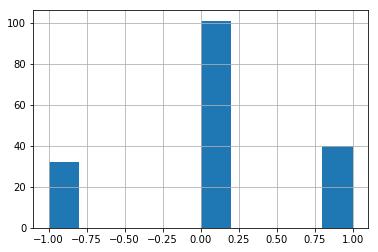

In [65]:
%matplotlib inline

import matplotlib.pyplot as plt

(y_lm - y_test2).hist()


In [33]:
coeff = lm.coef_
coeff

array([  0.00000000e+00,   4.28151448e-10,   3.49555033e-03,
        -1.39550930e-01,   8.51369653e-02,   4.18717535e-01,
        -2.46421722e-02,   6.34633422e-02,   6.37726301e-01,
         2.23351565e-01,  -2.76336704e-04,  -2.16425645e-02,
         2.11555125e-01,  -1.44651106e-01,   4.26281434e-02,
        -9.61856876e-02,   9.18134060e-02,  -8.77554612e-02,
        -1.42849834e-01,  -9.36155218e-02,   2.76952171e-01,
         1.05269587e-01])

In [34]:
a = np.array(coeff)
b = np.argsort( a )
b

array([13, 18,  3, 15, 19, 17,  6, 11, 10,  0,  1,  2, 14,  7,  4, 16, 21,
       12,  9, 20,  5,  8])

In [35]:
max_influencer_cols = b
max_influencer_cols = max_influencer_cols[::-1]
max_influencer_cols

array([ 8,  5, 20,  9, 12, 21, 16,  4,  7, 14,  2,  1,  0, 10, 11,  6, 17,
       19, 15,  3, 18, 13])

In [36]:
def make_influencers(cols):
    influencers = []
    for index in cols:
        influencers.append(X2.columns[index])
    return influencers

In [37]:
top_factors = make_influencers(max_influencer_cols)
top_factors
top_factors = make_influencers(b)

In [38]:
top_factors

["': 'Horror'",
 "': 'TV Movie'",
 "': 'Action'",
 "': 'Mystery'",
 "': 'Thriller'",
 "': 'Science Fiction'",
 "': 'Comedy'",
 "': 'Fantasy'",
 "': 'Family'",
 'adult',
 'budget',
 'runtime',
 "': 'Music'",
 "': 'Crime'",
 "': 'Adventure'",
 "': 'Romance'",
 "': 'Western'",
 "': 'History'",
 "': 'Drama'",
 "': 'War'",
 "': 'Animation'",
 "': 'Documentary'"]

In [39]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [42]:
from sklearn.linear_model import Ridge
alphas = [1.0]
clf = Ridge(alpha=alphas)
clf.fit(X_train2, y_train2)
ridge_result = clf.predict(X_test2)

In [43]:
import sklearn.metrics
y_ridge =  [ round(x) for x in ridge_result ]
len(y_ridge)

173

Accuracy of Liner Regression test set  : 0.624277456647
mean_squared_error of Liner Regression test set: 0.375722543353
R2 of Liner Regression test set: -0.175517457663
F1 of Liner Regression test set: 0.624277456647


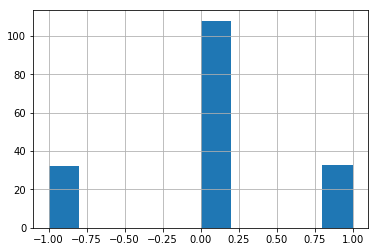

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt


ridge_acc =  sklearn.metrics.accuracy_score(y_test2,y_ridge) 
mse_ridge_acc = sklearn.metrics.mean_squared_error(y_test2,y_ridge)
r2_ridge_acc = sklearn.metrics.r2_score(y_test2,y_ridge)
f1_ridge_acc = sklearn.metrics.f1_score(y_test2,y_ridge, average='micro')

print("Accuracy of Liner Regression test set  :",ridge_acc )   
print("mean_squared_error of Liner Regression test set:",mse_ridge_acc )
print("R2 of Liner Regression test set:",r2_ridge_acc )
print("F1 of Liner Regression test set:",f1_ridge_acc )

(y_ridge - y_test2).hist()


In [48]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [49]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [55]:
neg_reviews = []
pos_reviews = []

for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))

for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))
    
print(len(pos_reviews), len(neg_reviews))

In [ ]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [ ]:
train_set = neg_reviews + pos_reviews
classifier = NaiveBayesClassifier.train(train_set)


In [ ]:
def analyze_comments(text):
    return classifier.classify(create_word_features(word_tokenize(text.decode('utf-8'))))

In [ ]:
genres_15_16_binned['nlp_result'] = genres_15_16_binned['Text'].apply(analyze_comments)
genres_15_16_binned.nlp_result.value_counts()

In [ ]:
import IPython
import numpy as np
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(5*np.pi*220*t) + np.sin(5*np.pi*224*t)
IPython.display.Audio(data,rate=framerate,autoplay=True)

In [ ]:
def is_positive(text):
    if text == 'positive':
        return 1
    return 0

genres_15_16_binned['nlp_result'] = genres_15_16_binned.nlp_result.apply(is_positive)

In [ ]:
genres_15_16_binned.head(2)

In [ ]:
#MAKE CSV once this finishes
genres_15_16_binned.to_csv("genre_with_nlp_results.csv")

In [ ]:
genres_15_16_binned.head(2)

In [ ]:
# ran = pd.read_csv("genre_with_nlp_results.csv")

In [ ]:
# ran.head()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(Y2, X2.asType(float))
results = model.fit()
print(results.summary())

In [76]:
X2.columns

Index(['adult', 'budget', 'runtime', '': 'Action'', '': 'Adventure'',
       '': 'Animation'', '': 'Comedy'', '': 'Crime'', '': 'Documentary'',
       '': 'Drama'', '': 'Family'', '': 'Fantasy'', '': 'History'',
       '': 'Horror'', '': 'Music'', '': 'Mystery'', '': 'Romance'',
       '': 'Science Fiction'', '': 'TV Movie'', '': 'Thriller'', '': 'War'',
       '': 'Western'', 'nlp_result'],
      dtype='object')

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(Y2, X2.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Vote Average   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     711.4
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:29:14   Log-Likelihood:                -700.91
No. Observations:                 862   AIC:                             1446.
Df Residuals:                     840   BIC:                             1551.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
adult                         0 

//anaconda/envs/pynew/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
//anaconda/envs/pynew/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [74]:
X2[X2.columns[:-1]]

,adult,budget,runtime,': 'Action',': 'Adventure',': 'Animation',': 'Comedy',': 'Crime',': 'Documentary',': 'Drama',...,': 'History',': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western'
0,False,0,91.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,False,0,95.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,False,0,84.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,False,0,120.0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,False,0,91.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,False,0,116.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,False,0,106.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,False,0,103.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,False,0,97.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
9,False,0,56.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(Y2, X2[X2.columns[:-1]].astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Vote Average   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     612.5
Date:                Sun, 30 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:37:41   Log-Likelihood:                -781.22
No. Observations:                 862   AIC:                             1604.
Df Residuals:                     841   BIC:                             1704.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
adult                         0 

//anaconda/envs/pynew/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
//anaconda/envs/pynew/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
//anaconda/envs/pynew/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [54]:
genres_15_16_binned = genres_15_16_binned.drop('Unnamed: 0',axis=1)
genres_15_16_binned.head(1)

,Popularity,Text,Title,Vote Average,Vote Count,adult,budget,revenue,runtime,vote_count,...,': 'Horror',': 'Music',': 'Mystery',': 'Romance',': 'Science Fiction',': 'TV Movie',': 'Thriller',': 'War',': 'Western',nlp_result
0,1.907407,GASI'm america diesel is something else like y...,400 Days,1,131,False,0,0,91.0,132.0,...,0,0,1,0,1,0,1,0,0,1
